### Probability in Python

In [1]:
import numpy as np 

## Function for uniform outcome
n : number of outcomes in the sample space

Output:  m  outcomes selected uniformly at random from 1 to  n

In [2]:
def uniform(n, m):
  return np.random.randint(1, n+1, size = m)

## Toss a coin
Toss once, 10 times and 100 times

1: Heads and 2: Tails

In [3]:
print(uniform(2, 1))
print(uniform(2, 10))
print(uniform(2,100))

[1]
[2 2 2 1 1 1 1 1 1 2]
[2 1 1 2 1 2 1 2 2 1 2 1 1 1 2 2 1 2 2 1 1 1 2 1 2 1 2 1 1 1 2 1 2 1 1 2 1
 2 2 1 2 2 1 2 2 1 1 1 1 1 1 1 1 2 1 1 1 2 1 2 2 2 1 2 2 1 1 1 1 2 1 2 1 1
 2 1 1 1 1 2 2 1 2 2 2 1 2 1 1 1 2 2 2 2 2 1 1 2 1 1]


### Throw a die
Throw once, 10 times and 100 times

In [4]:
print(uniform(6, 1))
print(uniform(6, 10))
print(uniform(6,100))

[5]
[4 4 6 4 3 1 5 4 2 5]
[3 6 1 5 6 3 3 1 5 1 3 6 5 5 5 2 2 1 3 5 5 3 2 3 2 1 6 3 6 1 5 4 6 4 3 2 4
 1 5 3 6 2 3 3 2 2 2 4 2 5 6 3 6 4 2 1 6 1 2 6 4 6 3 2 5 1 1 3 4 4 1 5 4 3
 5 2 1 3 2 5 4 3 6 1 4 2 1 2 1 2 4 1 4 6 1 1 3 5 3 1]


### Estimating probability by simulation - Monte Carlo
The probability of an event  A  can be estimated as follows. We can simulate the experiment repeatedly and independently, say  N  times, and count the number of times the event occurred, say  NA .

A good estimate of  P(A)  is the following:
                                            P(A)≈Na/N 
                                            
As  N  grows larger and larger, the estimate becomes better and better. This method is generally termed as Monte Carlo simulation.

We will first evaluate probability of coin toss described above using Monte Carlo simulations. There are two steps: generate a large number of tosses and count the number of heads or tails. These two steps can be written in a single loop usually.

You should run the simulation multiple times to see what probability estimate is obtained each time. You will see that the estimate is close to 0.5.

In [5]:
no_heads = 0   #variable for storing number of heads
for i in range(1000): #repeat 1000 times
  if uniform(2, 1) == 1: #check if coin toss is heads
    no_heads = no_heads + 1
print(no_heads/1000) #probability estimate by Monte Carlo

0.463


### Probability of die showing a number
We will modify the Monte Carlo simulation above for finding the probability that a dies shows a number falling in an event  A . You will see that the estimate is close to  P(A) . If you change the loop iterations to 10000, the estimate will be much closer to  P(A)  and more consistent as well.

In [6]:
no = 0   #variable for storing number of event occurence
for i in range(10000): #repetitions
  die = uniform(6,1)  #experiment
  if die == 1 or die == 3: #Event
    no = no + 1
print(no/10000) #probability estimate by Monte Carlo

0.3302


### Birthday problem
In a group of  n  persons, what is the chance that some two have the same birthday? Assume birthday of a person is uniformly distributed in  {1,2,…,365}  and is independent of all other birthdays. Most people will think that you need at least 100 persons before you start seeing same birthdays. However, surprisingly perhaps, even with 23 persons there is a 50% chance of two sharing a birthday.

Event  A : some two have same birthday

Event  Ac : no two have same birthday

Ac : (Birthday 1 on any date  B1 ) and (Birthday 2 on any date other than  B1 ) and (Birthday 3 on any date other than  B1 ,  B2 ) and ... and (Birthday  n  on any day other than  B1,B2,…,Bn−1 )

P(Ac)=1⋅(1−1/365)(1−2/365)⋯(1−(n−1/365))

If  n=10 , what is the chance? If  n=30 , what is the chance?

We will do a Monte Carlo simulation to estimate the probability and compare with the calculation above.

In [7]:
no = 0   #variable for storing number of event occurence
n = 60 #number of persons
print(1 - np.prod(1-np.arange(1,n)/365)) #probability from expression

for i in range(1000):
  B = np.zeros(366)   #array to keep track of birthdays seen
  for j in range(n): #generate birthdays for each person
    Bi = uniform(365, 1) #i-th birthday
    if B[Bi]  == 0:  #if Bi is seen for the first time
      B[Bi] = 1  #make note that Bi has been seen
    else:
      no = no + 1   #if Bi has been seen before, then two birthdays are same 
      break   #we can stop generating more birthdays and exit loop early

print(no/1000) #probability estimate by Monte Carlo

0.994122660865348
0.994


### Monty Hall problem

In [8]:
no = 0   #variable for storing number of event occurence
for i in range(1000):
  car_loc = uniform(3, 1)
  if car_loc == 1:
    goat1_loc = 2; goat2_loc = 3
  elif car_loc == 2:
    goat1_loc = 1; goat2_loc = 3
  else:
    goat1_loc = 1; goat2_loc = 2

  contestant_orig = uniform(3, 1)
  if contestant_orig == goat1_loc:
    host_reveal_loc = goat2_loc; other_closed_door = car_loc
  elif contestant_orig == goat2_loc:
    host_reveal_loc = goat1_loc; other_closed_door = car_loc
  else:
    host_reveal_loc = goat1_loc; other_closed_door = goat2_loc
  if other_closed_door == car_loc:
    no = no + 1

print(no/1000) #probability estimate by Monte Carlo

0.685


### Polya's urn scheme

In [9]:
no = 0   #variable for storing number of event occurence
r = 10; b = 5 #assume 1 to r is red and r+1 to r+b is blue
print(r/(r+b))
for i in range(1000):
  r = 10; b = 5
  c = 3
  for j in range(5): #do 5 steps
    if uniform(r+b, 1) <= r:
      r = r + c
    else:
      b = b + c
  if uniform(r+b, 1) <= r: #in the 6th step, count if red ball drawn
    no = no + 1
print(no/1000) #probability estimate by Monte Carlo

0.6666666666666666
0.68


### Gambler's ruin (simple random walk)

### Toss a biased coin

In [10]:
def biased(p, m):
  return 2-(np.random.rand(m) < p)

In [11]:
no_heads = 0   #variable for storing number of heads
p = 0.25
print(p)
for i in range(1000):
  if biased(p, 1) == 1:
    no_heads = no_heads + 1
print(no_heads/1000) #probability estimate by Monte Carlo

0.25
0.244


## Biased Gambler's ruin

In [12]:
no = 0   #variable for storing number of event occurence
p = 0.35
qbyp = (1-p)/p
k = 5; N = 10
print((qbyp**k-qbyp**N)/(1-qbyp**N))
for i in range(1000):
  k = 5
  while k > 0 and k < N:
    if biased(p, 1) == 1:
      k = k + 1
    else:
      k = k - 1
  if k == 0:
    no = no + 1
print(no/1000) #probability estimate by Monte Carlo

0.9566941509920124
0.964


##  Casino die game
Throw a pair of die. A player bets  k1  units of money on whether the sum of the two numbers is Under 7 or Over 7, and  k2  units on Equal to 7. For Under 7 and Over 7, the returns are  a :1, while, for Equal to 7, the returns are  b :1, if the player wins the bet. If the bet is lost, the unit of money goes to the casino.

The strategy for betting will be to independently and randomly select one of the 3 bets. The simulation will track the average return over a large number of trails.

In [13]:
a = 1.0; b = 4.0
k1 = 1; k2 = 1
print((((a-1)*5-7)*k1+((b-1)-5)*k2)/6/3) #expected gain
avg_return = 0
for i in range(1000):
  bet = uniform(3,1) #1 - Under 7, 2 - Over 7, 3 - Equal to 7
  sum = uniform(6,1) + uniform(6,1)
  if ((bet == 1) and (sum < 7)) or ((bet == 2) and (sum > 7)): #win for Under 7 or Over 7 bet
    avg_return = avg_return + k1*(a-1)/1000
  if (bet == 3) and (sum == 7): #win for Equal to 7 bet
    avg_return = avg_return + k2*(b-1)/1000
  if ((bet == 1) and (sum >= 7)) or ((bet == 2) and (sum <= 7)): #loss for Under 7 or Over 7 bet
    avg_return = avg_return + (-k1)/1000
  if (bet == 3) and (sum != 7): #loss for Equal to 7 bet
    avg_return = avg_return + (-k2)/1000
  
print(avg_return) #simulated gain

-0.5
-0.5440000000000005


### Import statistics module

In [14]:
import scipy.stats as st

## Expected value of common distributions
The module has functions for generating binomial, geometric, Poisson and other distributions. We will generate a large number of samples and compute the average value and compare with the expected value.

In [15]:
#binomial(20,0.3)
print(20*0.3) #expected value
x = st.binom.rvs(20,0.3,size=1000)
print(np.sum(x)/1000) #average value in simulation

6.0
5.969


In [16]:
#geometric(0.3)
print(1/0.3) #expected value
x = st.geom.rvs(0.3,size=1000)
print(np.sum(x)/1000) #average value in simulation

3.3333333333333335
3.406


In [17]:
#Poisson(6)
print(6) #expected value
x = st.poisson.rvs(6,size=1000)
print(np.sum(x)/1000) #average value in simulation

6
5.963


### Balls and bins
Suppose  m  balls are thrown independently and uniformly at random into  n  bins. We will compute the expected number of empty bins by simulation and compare with the theoretical value of  n(1−1/n)m≈ne−m/n .

In [18]:
m = 10; n = 3
print(n*((1-1/n)**m)) #expected value
avg_empty_bins = 0
for i in range(1000):
  no_balls = np.zeros(n, dtype=int) #keep track of balls in bins
  for ball in range(m):
    bin = uniform(n, 1)
    no_balls[bin-1] += 1

  no_empty_bins = 0
  for bin in range(n):
    if no_balls[bin] == 0:
      no_empty_bins += 1

  avg_empty_bins += no_empty_bins/1000.0

print(avg_empty_bins) #average value in simulation

0.0520245897474979
0.047000000000000035


### Common continuous distributions and histograms
Scipy stats module can be used to generate samples from common continuous distributions. We will generate a number of such samples and plot their histogram to confirm that the samples follow the expected density function.

For histograms, we will use the hist() function from the matplotlib.pyplot module imported below.

In [19]:
import matplotlib.pyplot as plt

### Uniform distribution
We will begin with the uniform distribution.

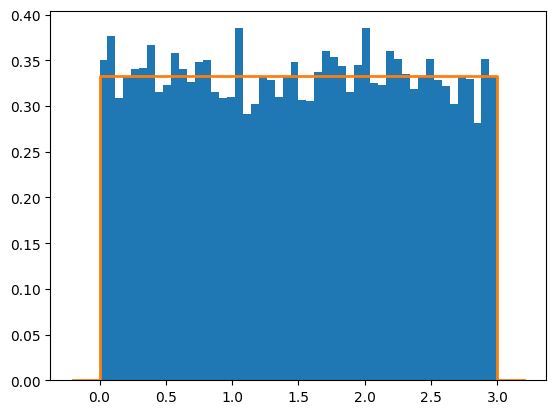

In [20]:
x = st.uniform.rvs(0,3,size=10000)
plt.hist(x,bins=50,range=(0,3),density=True) #blue histogram
plt.plot([-0.2,0,0,3,3,3.2],[0,0,1.0/3,1.0/3,0,0],lw=2) #orange line. uniform[0,3] density
plt.show()

## From histogram to density

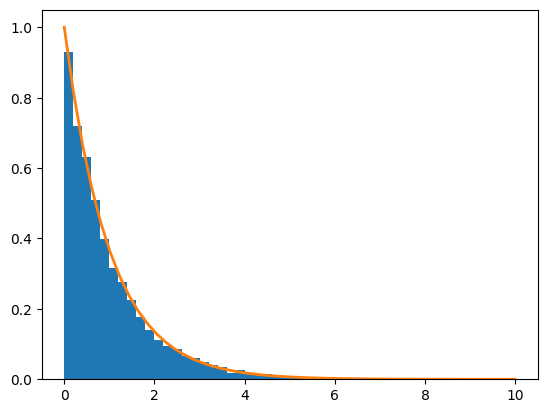

In [21]:
x = st.expon.rvs(scale=1,size=10000)
plt.hist(x,bins=50,range=(0,10),density=True) #blue histogram
xp = np.linspace(0,10,50)
plt.plot(xp,st.expon.pdf(xp,scale=1),lw=2) #orange line, exp(\lambda) density
plt.show()

### Normal distribution

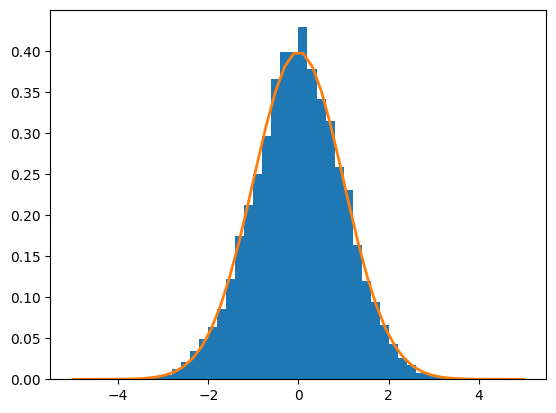

In [22]:
x = st.norm.rvs(loc=0, scale=1, size=10000)
plt.hist(x,bins=50,range=(-5,5),density=True) #blue histogram
xp = np.linspace(-5,5,50)
plt.plot(xp,st.norm.pdf(xp,loc=0,scale=1),lw=2) #orange line, normal pdf
plt.show()

In [23]:
from sklearn.datasets import load_iris

In [24]:
iris = load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

### Summarizing the data
iris.data: 2D array containing all data (size 150 x 4)

Class 0: Row 0 to Row 49 of iris.data array
Class 1: Row 50 to Row 99 of iris.data array
Class 2: Row 100 to Row 149 of iris.data array
From the module scipy.stats, we can use the 'describe' command to get summary statistics of an array of data.

In [25]:
# all data
sum_stats = st.describe(iris.data)
print(sum_stats.minmax)

(array([4.3, 2. , 1. , 0.1]), array([7.9, 4.4, 6.9, 2.5]))


In [26]:
print(sum_stats.mean)
print(sum_stats.variance)

[5.84333333 3.05733333 3.758      1.19933333]
[0.68569351 0.18997942 3.11627785 0.58100626]


In [27]:
#Class 0
sum_stats = st.describe(iris.data[:50,:])
print(sum_stats.minmax)
print(sum_stats.mean)
print(sum_stats.variance)

(array([4.3, 2.3, 1. , 0.1]), array([5.8, 4.4, 1.9, 0.6]))
[5.006 3.428 1.462 0.246]
[0.12424898 0.1436898  0.03015918 0.01110612]


### Plotting histograms to get a sense of data
For every class, we can create histogram plots. The code below generates these histograms for Class 0.

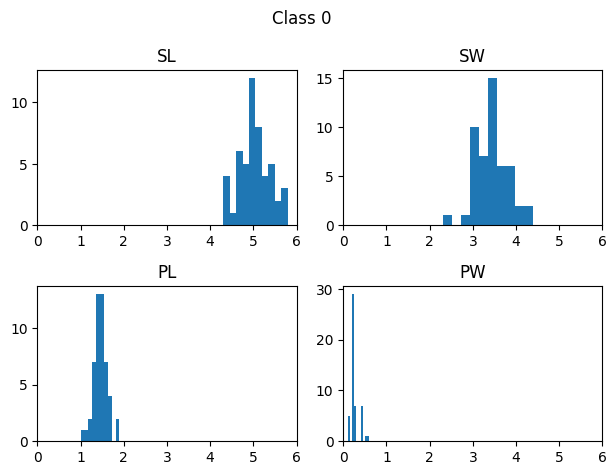

In [28]:
plt.subplot(221)
plt.hist(iris.data[:50,0])
plt.xlim([0,6])
plt.title('SL')
plt.subplot(222)
plt.hist(iris.data[:50,1])
plt.xlim([0,6])
plt.title('SW')
plt.subplot(223)
plt.hist(iris.data[:50,2])
plt.xlim([0,6])
plt.title('PL')
plt.subplot(224)
plt.hist(iris.data[:50,3])
plt.xlim([0,6])
plt.title('PW')
plt.suptitle('Class 0')
plt.tight_layout()
plt.show()

### 2D histograms
The following code shows how to plot 2D histograms. This is being provided as a reference for those who are interested.

Text(0.5, 0.5, 'PW')

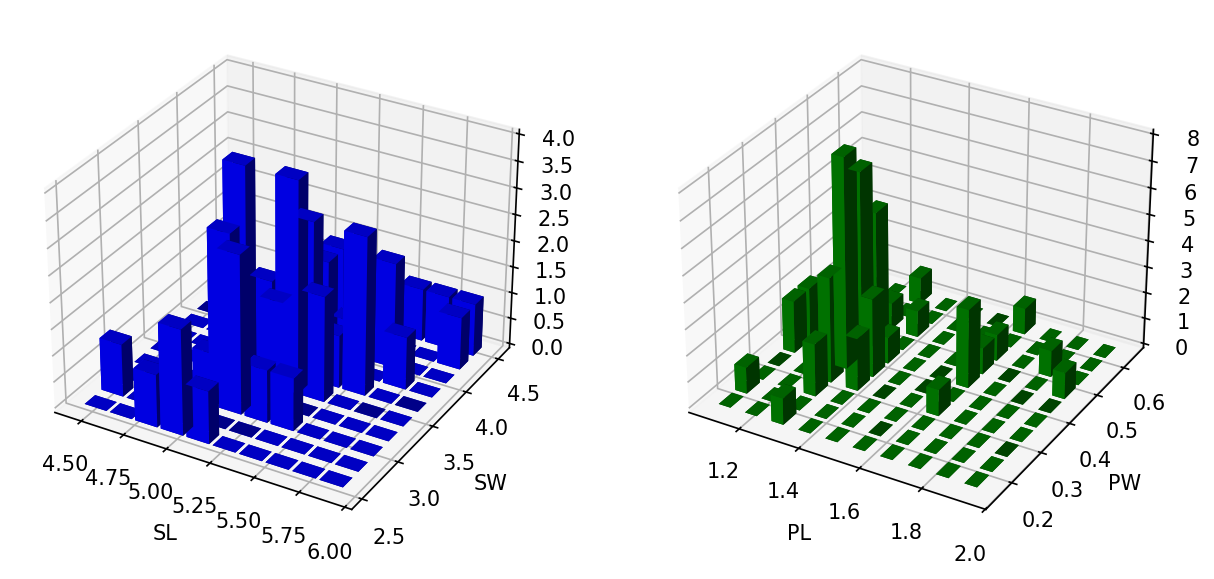

In [29]:
fig = plt.figure(figsize=(10,5), dpi = 150)
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')

H, _x, _y = np.histogram2d(iris.data[:50,0], iris.data[:50,1])
_xx, _yy = np.meshgrid(_x[1:], _y[1:])
xx, yy, HH = _xx.ravel(), _yy.ravel(), H.ravel()

ax1.bar3d(xx, yy, np.zeros_like(HH), 0.13, 0.13, HH, shade=True, color='b')

ax1.set_xlabel('SL')
ax1.set_ylabel('SW')

H, _x, _y = np.histogram2d(iris.data[:50,2], iris.data[:50,3])
_xx, _yy = np.meshgrid(_x[1:], _y[1:])
xx, yy, HH = _xx.ravel(), _yy.ravel(), H.ravel()

ax2.bar3d(xx, yy, np.zeros_like(HH), 0.04, 0.04, HH, shade=True, color='g')

ax2.set_xlabel('PL')
ax2.set_ylabel('PW')